# 제 3차 조별 데이터 분석 실습

* Mission
    * 지금까지 배운 기술을 활용하여 데이터 분석을 해본다.
    * 데이터 원본 분석을 한다.
    * 결측치, 이상치를 점검해 본다.
    * 전처리
    * 탐색적 연구 (Step1, Step2를 반복하여 데이터 분석의 깊이를 더한다.)
         * Step1] 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다. 
         * Step2] 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.
    * 최종 결론을 내린다.

## 아래에 데이터를 import 하세요.

In [60]:
# 데이터 import 코드 구현
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# chipo = pd.read_csv('data/book_data.csv',encoding='utf-8')

In [77]:
dairy_queen = pd.read_csv('../data/dairy-queen-menu-nutrition2.csv',encoding='cp949')

# Dairy Queen 한국 런칭 전략 수립을 위한 영양성분 분석

In [78]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


In [79]:
dairy_queen

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Strawberry Banana Smoothie - XLarge,620.0,5.0,0.5,0.0,0.0,0.0,240.0,144.0,5.0,131.0,11.0,M
225,Tripleberry Smoothie - Large,460.0,0.0,0.0,0.0,0.0,0.0,180.0,107.0,2.0,104.0,8.0,M
226,Tripleberry Smoothie - Medium,370.0,0.0,0.0,0.0,0.0,0.0,135.0,87.0,2.0,84.0,6.0,M
227,Tripleberry Smoothie - Small,280.0,0.0,0.0,0.0,0.0,0.0,90.0,66.0,1.0,65.0,4.0,M


## 데이터 원본 분석

### 아래 내용을 확인하세요
* 데이터 사이즈
* 데이터 타입
* 각 열의 의미 (열의 이름 및 데이터를 보고 팀원과 상의하여 분석)
* 기타 확인하고 싶은 사항

In [80]:
dairy_queen.shape

(229, 13)

In [81]:
dairy_queen.dtypes

Menu Item               object
Calories (kcal)        float64
Fat Calories (kcal)    float64
Total Fat (g)          float64
Saturated Fat (g)      float64
Trans Fat (g)          float64
Cholesterol (mg)       float64
Sodium (mg)            float64
Carbohydrates (g)      float64
Fiber (g)              float64
Sugars (g)             float64
Protein (g)            float64
Allergens               object
dtype: object

In [82]:
dairy_queen.size

2977

In [83]:
dairy_queen.columns

Index(['Menu Item', 'Calories (kcal)', 'Fat Calories (kcal)', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Allergens'],
      dtype='object')

### 원본 데이터 분석 후 학습한 사항

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

In [84]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


In [85]:
dairy_queen.tail()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
224,Strawberry Banana Smoothie - XLarge,620.0,5.0,0.5,0.0,0.0,0.0,240.0,144.0,5.0,131.0,11.0,M
225,Tripleberry Smoothie - Large,460.0,0.0,0.0,0.0,0.0,0.0,180.0,107.0,2.0,104.0,8.0,M
226,Tripleberry Smoothie - Medium,370.0,0.0,0.0,0.0,0.0,0.0,135.0,87.0,2.0,84.0,6.0,M
227,Tripleberry Smoothie - Small,280.0,0.0,0.0,0.0,0.0,0.0,90.0,66.0,1.0,65.0,4.0,M
228,Tripleberry Smoothie - XLarge,660.0,0.0,0.0,0.0,0.0,0.0,220.0,153.0,3.0,149.0,10.0,M


In [86]:
dairy_queen.isnull().sum()

Menu Item               0
Calories (kcal)         0
Fat Calories (kcal)     0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           2
Cholesterol (mg)        0
Sodium (mg)             0
Carbohydrates (g)       0
Fiber (g)               0
Sugars (g)              0
Protein (g)             0
Allergens              16
dtype: int64

In [87]:
dairy_queen.loc[(np.isnan(dairy_queen['Trans Fat (g)'])), :]

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
57,Country Gravy Dipping Sauce,70.0,40.0,4.5,1.5,NaN,0.0,360.0,6.0,0.0,1.0,0.0,M\S\W
62,Marzetti Dijon Honey Mustard,180.0,150.0,16.0,2.5,NaN,10.0,230.0,7.0,0.0,7.0,0.0,E


In [88]:
dairy_queen.loc[(pd.isnull(dairy_queen['Allergens'])), :]

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
38,Applesauce,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,7.0,0.0,NaN
39,Banana,110.0,5.0,0.0,0.0,0.0,0.0,0.0,27.0,3.0,14.0,1.0,NaN
41,"Fries, Kids'",170.0,70.0,8.0,1.0,0.0,0.0,370.0,23.0,2.0,0.0,3.0,NaN
48,"Fries, Large",450.0,190.0,21.0,3.0,0.0,0.0,950.0,59.0,4.0,0.0,8.0,NaN
49,"Fries, Regular",280.0,110.0,13.0,2.0,0.0,0.0,590.0,36.0,3.0,0.0,5.0,NaN
50,Lay’s® BBQ Potato Chips,230.0,140.0,15.0,2.0,0.0,0.0,230.0,23.0,2.0,3.0,3.0,NaN
51,Lay’s® Potato Chips - Original,240.0,140.0,16.0,2.0,0.0,0.0,250.0,23.0,2.0,1.0,3.0,NaN
56,BBQ Dipping Sauce Cup,90.0,0.0,0.0,0.0,0.0,0.0,430.0,21.0,1.0,16.0,1.0,NaN
63,Marzetti Light Italian Dressing,15.0,10.0,1.0,0.0,0.0,0.0,730.0,2.0,0.0,2.0,0.0,NaN
64,Wild Buffalo Dipping Sauce Cup,90.0,90.0,10.0,1.0,0.0,0.0,1000.0,1.0,0.0,0.0,0.0,NaN


In [92]:
dairy_queen.describe()

,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g)
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,567.292576,207.694323,23.093013,12.174672,46.004367,469.759825,77.489083,1.366812,58.270742,13.479476
std,313.542447,151.594545,16.852665,8.975359,36.692714,514.575544,45.169623,1.458772,42.420783,9.637712
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,100.000000,12.000000,5.000000,25.000000,180.000000,40.000000,0.000000,14.000000,8.000000
50%,500.000000,180.000000,20.000000,11.000000,45.000000,290.000000,73.000000,1.000000,58.000000,12.000000
75%,760.000000,290.000000,32.000000,18.000000,65.000000,520.000000,106.000000,2.000000,87.000000,18.000000
max,1510.000000,650.000000,72.000000,41.000000,180.000000,2710.000000,203.000000,9.000000,158.000000,49.000000


## 결측치, 이상치 처리 방안 결정  
* Trans Fat 결측치의 경우 아래와 같이 dairy_queen 사이트에 영양정보가 있으며 트랜스 지방은 두 종류 다 0g이다.
* Allergens 결측치의 경우 알레르기를 유발하는 물질이 있지 않음을 표시하는 의미로 '없음'으로 처리하기로 한다.
* 그 외 특별한 이상치는 없는 것으로 추정된다.

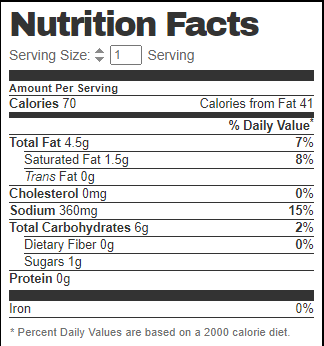 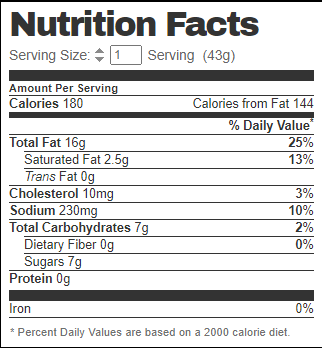 

In [89]:
dairy_queen['Trans Fat (g)']=dairy_queen['Trans Fat (g)'].fillna('0')

In [90]:
dairy_queen['Allergens']=dairy_queen['Allergens'].fillna('None')

In [91]:
dairy_queen.isnull().sum()

Menu Item              0
Calories (kcal)        0
Fat Calories (kcal)    0
Total Fat (g)          0
Saturated Fat (g)      0
Trans Fat (g)          0
Cholesterol (mg)       0
Sodium (mg)            0
Carbohydrates (g)      0
Fiber (g)              0
Sugars (g)             0
Protein (g)            0
Allergens              0
dtype: int64

## 전처리 작업 

In [93]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


## 1차 탐색적 분석
### Step1            
#### 데이터 분석의 목적, 대상 또는 가설을 세운다.
* 데이터 분석의 목적 : dairy_queen의 미국 현지 메뉴 영양 성분 분석을 통한 한국 현지화 전략 수립하고자 한다.
* 데이터 분석의 대상 : dairy_queen 메뉴의 영양성분 정보
* 가설 : 미국 현지 메뉴의 경우 지방 및 당분이 다량 함류된 고열량 메뉴가 주를 이루고 있을 것이다.

### Step2  
Step1에서 세운 가설을 지금까지 배운 모든 기술을 활용하여 검증해 보세요.
예) 통계자료, 데이터 재구조화, 시각화등

In [124]:
blizzard = dairy_queen[dairy_queen['Menu Item'].str.contains('Blizzard')]

In [125]:
blizzard = blizzard[~blizzard['Menu Item'].str.contains('Cake', case=False)]

In [127]:
blizzard

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W
5,Cinnamon Roll Centers Blizzard - Medium,890.0,350.0,32.0,20.0,1.5,120.0,390.0,132.0,1.0,106.0,18.0,E\M\W
6,Cinnamon Roll Centers Blizzard - Large,1170.0,470.0,43.0,27.0,2.0,160.0,520.0,175.0,1.0,139.0,22.0,E\M\W
7,Frosted Sugar Cookie Blizzard - Mini,390.0,110.0,16.0,8.0,0.0,35.0,160.0,54.0,0.0,42.0,8.0,E\M\S\W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Turtle Pecan Cluster Blizzard - Large,1370.0,640.0,71.0,41.0,1.5,85.0,510.0,165.0,4.0,132.0,24.0,M\S\T
129,Very Cherry Chip Blizzard - Mini,320.0,100.0,11.0,7.0,0.0,30.0,115.0,48.0,1.0,41.0,7.0,M\S
130,Very Cherry Chip Blizzard - Small,550.0,170.0,19.0,13.0,0.5,50.0,190.0,84.0,1.0,72.0,12.0,M\S
131,Very Cherry Chip Blizzard - Medium,730.0,230.0,25.0,18.0,1.0,65.0,250.0,113.0,2.0,97.0,16.0,M\S


In [129]:
blizzard.describe().mean()

Calories (kcal)        658.260538
Fat Calories (kcal)    259.926793
Total Fat (g)           35.756308
Saturated Fat (g)       23.759349
Cholesterol (mg)        62.819698
Sodium (mg)            370.559182
Carbohydrates (g)      100.052554
Fiber (g)               10.600565
Sugars (g)              80.910543
Protein (g)             22.823039
dtype: float64

### 참고) 한국 일일 영양성분 기준치

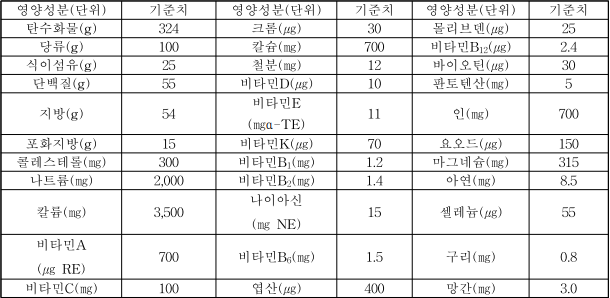

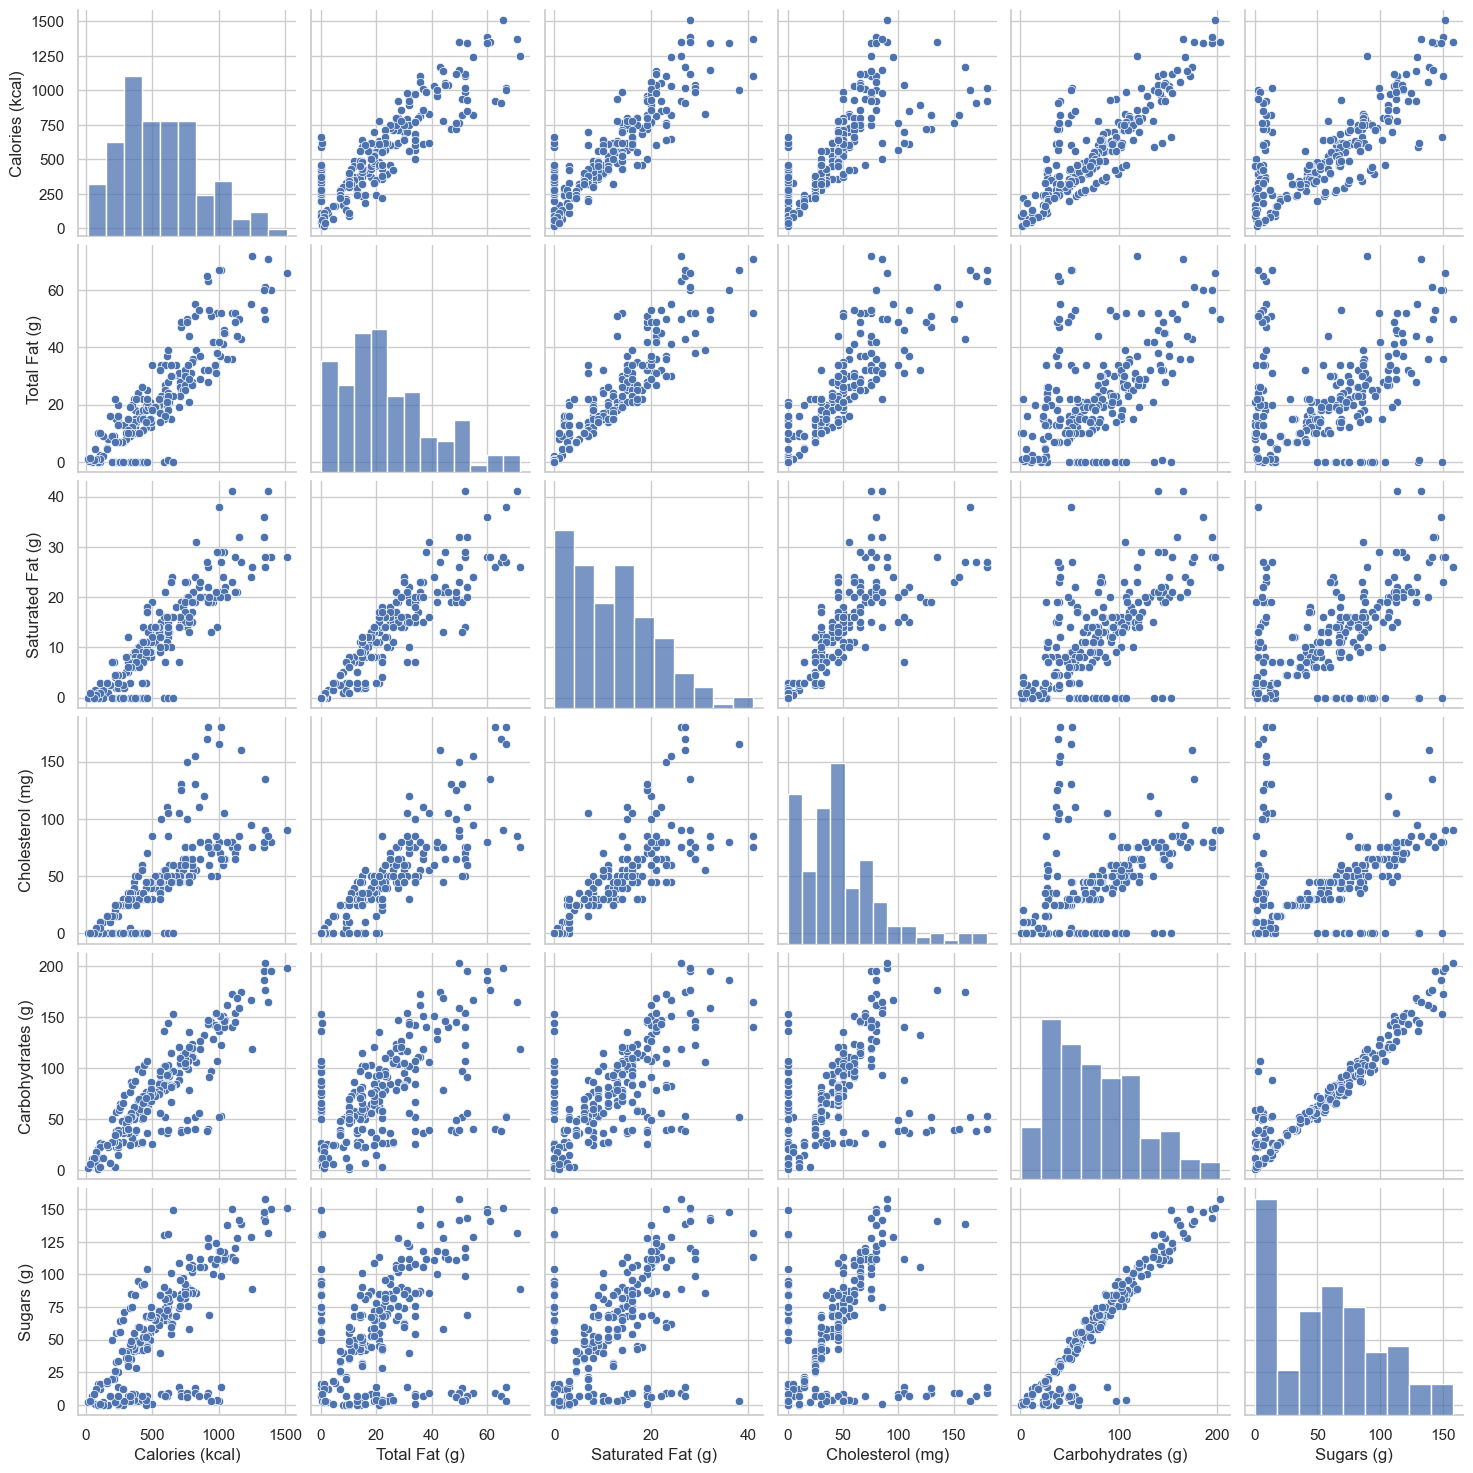

In [108]:

sns.set(style='whitegrid', context='notebook')
sns.pairplot(dairy_queen[['Calories (kcal)', 'Total Fat (g)', 
                     'Saturated Fat (g)', 'Cholesterol (mg)','Carbohydrates (g)','Sugars (g)']], height=2.5)
plt.show()

In [109]:
cols = ['Calories (kcal)', 'Total Fat (g)', 
                     'Saturated Fat (g)', 'Cholesterol (mg)','Carbohydrates (g)','Sugars (g)']
corr = dairy_queen[cols].corr(method = 'pearson')
print(corr)

                   Calories (kcal)  Total Fat (g)  Saturated Fat (g)  \
Calories (kcal)           1.000000       0.875173           0.880025   
Total Fat (g)             0.875173       1.000000           0.895459   
Saturated Fat (g)         0.880025       0.895459           1.000000   
Cholesterol (mg)          0.745164       0.842180           0.796104   
Carbohydrates (g)         0.861114       0.515102           0.636365   
Sugars (g)                0.711894       0.316601           0.515846   

                   Cholesterol (mg)  Carbohydrates (g)  Sugars (g)  
Calories (kcal)            0.745164           0.861114    0.711894  
Total Fat (g)              0.842180           0.515102    0.316601  
Saturated Fat (g)          0.796104           0.636365    0.515846  
Cholesterol (mg)           1.000000           0.401133    0.248367  
Carbohydrates (g)          0.401133           1.000000    0.946115  
Sugars (g)                 0.248367           0.946115    1.000000  


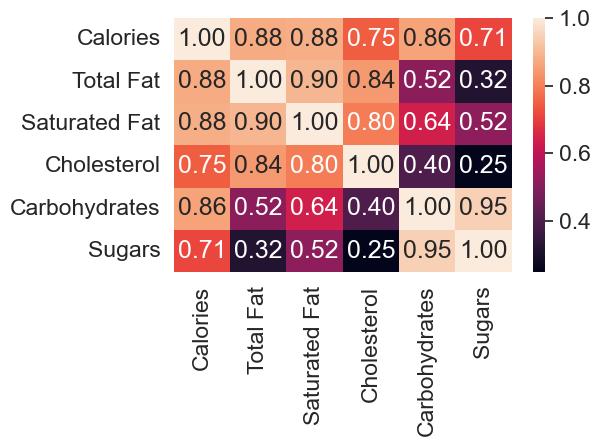

In [110]:
cols_view = ['Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol','Carbohydrates','Sugars'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            annot=True, 
            fmt='.2f',
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()